<a href="https://colab.research.google.com/github/juliosdutra/Controle_de_Processos_UFES/blob/main/3.Transfer-functions/simulacao_dinamica_tanques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instale a biblioteca control, se necessário
!pip install -qq control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 7.8 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

In [4]:
# Função para simular um tanque de nível
def tank_transfer_function(A, R):
    # Constante de tempo
    tau = A * R
    # Ganho estacionário
    K = R
    # Função de transferência G(s) = K / (tau*s + 1)
    G = ct.tf([K], [tau, 1])
    return G

In [5]:
# Parâmetros do sistema
A1, A2 = 2.0, 1.0  # Áreas dos tanques (m²)
R1, R2 = 1.0, 1.0  # Resistências (caso 1: iguais)
R1_adj, R2_adj = 0.5, 1.0  # Resistências ajustadas (caso 2: tau1 = tau2)

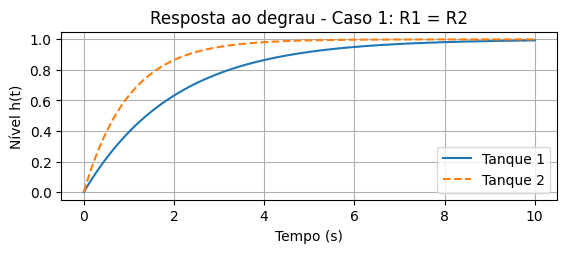

In [9]:
# Caso 1: R1 = R2
G1_case1 = tank_transfer_function(A1, R1)
G2_case1 = tank_transfer_function(A2, R2)

# Simulação de um entrada degrau
t = np.linspace(0, 10, 1000)  # 10 segundos, 1000 pontos
t1, h1_case1 = ct.step_response(G1_case1, T=t)
t2, h2_case1 = ct.step_response(G2_case1, T=t)


# Caso 1: R1 = R2
plt.subplot(2, 1, 1)
plt.plot(t1, h1_case1, label="Tanque 1")
plt.plot(t2, h2_case1, '--', label="Tanque 2")
plt.title("Resposta ao degrau - Caso 1: R1 = R2")
plt.xlabel("Tempo (s)")
plt.ylabel("Nível h(t)")
plt.legend()
plt.grid()

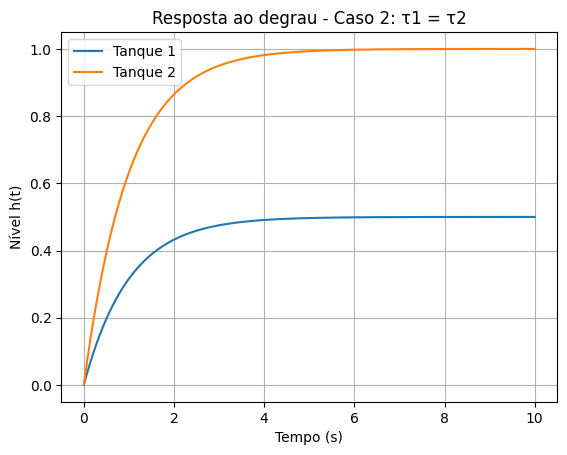

In [10]:
# Caso 2: τ1 = τ2 (R ajustado)
G1_case2 = tank_transfer_function(A1, R1_adj)
G2_case2 = tank_transfer_function(A2, R2_adj)

# Tempo de simulação e entrada de degrau
t3, h1_case2 = ct.step_response(G1_case2, T=t)
t4, h2_case2 = ct.step_response(G2_case2, T=t)

# Caso 2: τ1 = τ2
plt.plot(t3, h1_case2, label="Tanque 1")
plt.plot(t4, h2_case2, label="Tanque 2")
plt.title("Resposta ao degrau - Caso 2: τ1 = τ2")
plt.xlabel("Tempo (s)")
plt.ylabel("Nível h(t)")
plt.legend()
plt.grid()